# Importación de librerías

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import re # Expresiones regulares
from sklearn import preprocessing # LabelEncoder

In [2]:
data = pd.read_table("../Dataset/labeledEligibilitySample10k.csv", header = None)

In [3]:
print(data.shape)

(10000, 1)


### Se transforma la variable elegible (la salida) en 0 y 1

In [4]:
clin_trial = pd.DataFrame(np.array(data).reshape(10000,1), columns=['Description'])
clin_trial[:].head(10)

,Description
0,"18518,__label__0,study interventions are Erlot..."
1,"71331,__label__0,study interventions are Antib..."
2,"232342,__label__0,study interventions are Cycl..."
3,"450677,__label__0,study interventions are Pred..."
4,"410008,__label__0,study interventions are Inte..."
5,"307723,__label__0,study interventions are Erlo..."
6,"378773,__label__0,study interventions are Phar..."
7,"479580,__label__0,study interventions are Myco..."
8,"458795,__label__0,study interventions are gamm..."
9,"366518,__label__0,study interventions are Succ..."


In [5]:
clin_trial['Num'], clin_trial['ExtraPart'] = clin_trial['Description'].str.split(',', 1).str
clin_trial=clin_trial.drop(['Num'], axis=1)

clin_trial['Label'], clin_trial['TrashPart'] = clin_trial['ExtraPart'].str.split(',', 1).str
clin_trial['Eligible'] = clin_trial['Label'].str.extract('(\d)', expand=True)
clin_trial=clin_trial.drop(['Label'], axis=1)
clin_trial=clin_trial.drop(['ExtraPart'], axis=1)

clin_trial['Interventions'], clin_trial['Diagnoses'] = clin_trial['TrashPart'].str.split('.', 1).str
clin_trial=clin_trial.drop(['TrashPart'], axis=1)

clin_trial=clin_trial.drop(['Description'], axis=1)

clin_trial.head(10)

,Eligible,Interventions,Diagnoses
0,0,study interventions are Erlotinib Hydrochloride,recurrent midline lethal granuloma of the par...
1,0,study interventions are Antibodies,fallopian tube cancer diagnosis and periphera...
2,0,study interventions are Cyclosporine,recurrent adult diffuse mixed cell lymphoma d...
3,0,study interventions are Prednisolone phosphate,childhood immunoblastic large cell lymphoma d...
4,0,study interventions are Interferon-alpha,stage multiple myeloma diagnosis and serum pr...
5,0,study interventions are Erlotinib Hydrochloride,patients must have carcinoma of unknown prima...
6,0,study interventions are Pharmacological Study,hepatoblastoma diagnosis and two weeks must h...
7,0,study interventions are Mycophenolic Acid,recurrent grade one follicular lymphoma diagn...
8,0,study interventions are gamma-secretase/Notch ...,recurrent non small cell lung cancer diagnosi...
9,0,study interventions are Succinylcholine,untreated childhood medulloblastoma diagnosis...


In [6]:
# Se quita study interventions are puesto que está en todas las muestras de la varialbe Interventions
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace("study interventions are\s", "")
clin_trial.sample(10)

,Eligible,Interventions,Diagnoses
3395,0,Cyclosporins,refractory follicular lymphoma diagnosis and ...
4737,0,Vaccines,neuroblastoma diagnosis and creatinine two ul...
9279,1,"""Antibodies, Monoclonal",bladder tumors diagnosis and exceptions are p...
5413,1,Nintedanib,stage iib non small cell lung carcinoma diagn...
7440,1,Fluorouracil,metastatic cancer diagnosis and re existing b...
7271,1,Capecitabine,cancer of gallbladder diagnosis and prior tra...
1584,0,Cisplatin,mixed germ cell tumor diagnosis and absolute ...
2944,0,Fludarabine,stage grade one follicular lymphoma diagnosis...
6653,1,Carboplatin,ovarian serous cystadenocarcinoma diagnosis a...
7813,1,Vaccines,metastatic cancer diagnosis and concurrent sy...


In [7]:
#Sirve para buscar palabras con esos caracteres

# for name in list(clin_trial.columns):
#     for sample in clin_trial[name]:
#         if re.findall('[+=*^#áÁéÉíÍóÓúÚ\[\]\$,.;:!@¡¿?\{\}\&`~\^\(\)|%_\-<>\'\"]', sample):
#             print(sample, "\n") ## Funciona para detectar caracteres especiales

In [8]:
# Se transforma todo a minúsculas
clin_trial['Interventions'] = clin_trial['Interventions'].str.lower() ##Todo a minúscula
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.lower()     ##Todo a minúscula

#Se reemplazan vocales con tildes en ambas variables
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[áäâà]', 'a', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[éêèë]', 'e', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[íïìî]', 'i', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[óôòö]', 'o', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[úûùü]', 'u', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('["]', '', regex=True)

clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[áäâà]', 'a', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[éêèë]', 'e', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[íïìî]', 'i', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[óôòö]', 'o', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[úûùü]', 'u', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('^\s', '', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('["]', '', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[;]', '', regex=True)



#clin_trial.sample(10)

In [9]:
# Total de categorías diferentes en la variable Interventions
len(np.unique(clin_trial['Interventions'])) 

1426

In [10]:
# Sirve para ver cuantos datos hay por categoría de interventions

datosInt = clin_trial['Interventions'].value_counts()

In [11]:
# Total de categorías diferentes en la variable Diagnoses
len(np.unique(clin_trial['Diagnoses']))

9786

In [12]:
datosDiag = clin_trial['Diagnoses'].value_counts() 
datosDiag

lymphoma diagnosis and not specified                                                                                                                                                                                              11
breast cancer diagnosis and not specified                                                                                                                                                                                          5
breast cancer diagnosis and see disease characteristics                                                                                                                                                                            5
symptomatic congestive heart failure                                                                                                                                                                                               5
childhood diffuse large cell lymphoma diagnosis and donor                           

## Codificación de la variable Interventions

In [13]:
labels = np.unique(clin_trial['Interventions'])

lb_interventions = preprocessing.LabelEncoder()
lb_interventions.fit(labels)
clin_trial['Interventions'] = lb_interventions.transform(clin_trial['Interventions']) 

In [14]:
clin_trial

,Eligible,Interventions,Diagnoses
0,0,464,recurrent midline lethal granuloma of the para...
1,0,101,fallopian tube cancer diagnosis and peripheral...
2,0,349,recurrent adult diffuse mixed cell lymphoma di...
3,0,1052,childhood immunoblastic large cell lymphoma di...
4,0,708,stage multiple myeloma diagnosis and serum pro...
...,...,...,...
9995,1,1109,prostate neoplasms diagnosis and if brain imag...
9996,1,200,multiple myeloma diagnosis and any condition i...
9997,1,1201,lung carcinoid tumor diagnosis and patients wh...
9998,1,939,stage iv colorectal cancer diagnosis and serio...


# Remover Stop Words

## Preliminares

In [15]:
# Se carga la libreria
from nltk.corpus import stopwords

# Se debe descargar el conjunto de 'Stop Words' la primera vez
import nltk
nltk.download('stopwords')

#Se carga la librería de lematización
#PONER conda install -c conda-forge spacy EN ANACONDA PROMPT
# Y python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")

#Se carga la librería de lematización
import spacy
nlp = spacy.load("en_core_web_sm")

#Se carga la librería de stemming y se inicializa el stemmer
import nltk
from nltk import SnowballStemmer
stemmer=SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Crear las palabras Token

## Lematización

"Dada una forma flexionada (es decir, en plural, en femenino, conjugada, etc), hallar el lema correspondiente. El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra. Es decir, el lema de una palabra es la palabra que nos encontraríamos como entrada en un diccionario tradicional: singular para sustantivos, masculino singular para adjetivos, infinitivo para verbos." -Wikipedia

In [16]:
#https://medium.com/qu4nt/reducir-el-número-de-palabras-de-un-texto-lematización-y-radicalización-stemming-con-python-965bfd0c69fa
toks = []

for sample in clin_trial['Diagnoses']:
    words = nlp(sample)
    lemma = [tok.lemma_.lower() for tok in words]
    #print(lemma)
    toks.append(lemma)
    

## Cargar las Stop Words

In [17]:
# Carga las Stop Words en inglés
stop_words = stopwords.words('english')

## Estaría bien revisar este conjunto 'english'. Pero supongo que es el más útil para nuestro caso también.
# Imprime algunas Stop Words
#stop_words[:100]

## Remover las Stop Words

In [18]:
tokens = []
for tok in toks:
    clean_word = [word for word in tok if word not in stop_words]
    tokens.append(clean_word)

## Stemming

"Es un método para reducir una palabra a su raíz o (en inglés) a un stem." - Wikipedia

In [19]:
stemms = []
for tok in tokens:
    var = [stemmer.stem(token) for token in tok]
    stemms.append(var)

In [20]:
##http://www.insightsbot.com/bag-of-words-algorithm-in-python-introduction/

def extract_words(sentence):
    words = []
    for i in sentence:
        if i not in words:
            words.append(i)
    return words

def getAll_words(data):
    words = []
    for i in data:
        wordsPerSentence = extract_words(i)
        for j in wordsPerSentence:
            if j not in words:
                words.append(j)
    return words

def wordFrequency(sentence, words):
    sentence_words = sentence
    # frequency word count
    bag = np.zeros(len(words))
    for sw in sentence_words:
        for i,word in enumerate(words):
            if word == sw: 
                bag[i] += 1
                
    return np.array(bag)

def bagOfWords(data, words):
    bow = []
    for i in data:
        freq = wordFrequency(i, words)
        bow.append(freq)
    return bow

In [21]:
words = getAll_words(stemms)
bow = bagOfWords(stemms, words)

In [22]:
bowArray = np.asarray(bow)
wordsArray = np.asarray(words)
df = pd.DataFrame(data=bowArray, columns= wordsArray)

In [23]:
df

,recurr,midlin,lethal,granuloma,paranas,sinus,nasal,caviti,diagnosi,protein,...,kaposiform_hemangioendothelioma,khe,damag,peroxid,color,bleach,streak,perm,relax,oxid
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Ordenar y eliminar palabras

In [113]:
import operator

bowDict = {}

for column in df:
    bowDict[column] = df[column].sum()

bowDict_sort = sorted(bowDict.items(), key=operator.itemgetter(1), reverse=True)

# print(bowDict_sort)

[('diagnosi', 9405.0), ('cancer', 3516.0), ('cell', 2343.0), ('patient', 2312.0), ('lymphoma', 2273.0), ('stage', 2057.0), ('prior', 1370.0), ('one', 1244.0), ('recurr', 1192.0), ('carcinoma', 1168.0), ('greater_than', 1167.0), ('studi', 1125.0), ('diseas', 1102.0), ('therapi', 1045.0), ('must', 993.0), ('breast', 986.0), ('two', 920.0), ('less_than', 913.0), ('adult', 859.0), ('within', 844.0), ('treatment', 773.0), ('three', 715.0), ('tumor', 712.0), ('non', 704.0), ('doc', 687.0), ('equal_than', 660.0), ('hundr', 636.0), ('iv', 626.0), ('-', 614.0), ('grade', 599.0), ('day', 599.0), ('lung', 595.0), ('histori', 575.0), ('week', 566.0), ('small', 566.0), ('month', 525.0), ('requir', 492.0), ('five', 483.0), ('neoplasm', 479.0), ('four', 477.0), ('receiv', 466.0), ('activ', 466.0), ('metastat', 450.0), ('iii', 449.0), ('use', 447.0), ('chemotherapi', 439.0), ('medic', 439.0), ('myeloma', 430.0), ('least', 423.0), ('system', 408.0), ('six', 406.0), ('investig', 400.0), ('ovarian', 398.

In [131]:
bowDict_sort2 = bowDict_sort
for word in bowDict_sort2:
    if word[1]>3400: #Para eliminar con un umbral
        bowDict_sort2.remove(word) 

[('cell', 2343.0),
 ('patient', 2312.0),
 ('lymphoma', 2273.0),
 ('stage', 2057.0),
 ('prior', 1370.0),
 ('one', 1244.0),
 ('recurr', 1192.0),
 ('carcinoma', 1168.0),
 ('greater_than', 1167.0),
 ('studi', 1125.0),
 ('diseas', 1102.0),
 ('therapi', 1045.0),
 ('must', 993.0),
 ('breast', 986.0),
 ('two', 920.0),
 ('less_than', 913.0),
 ('adult', 859.0),
 ('within', 844.0),
 ('treatment', 773.0),
 ('three', 715.0),
 ('tumor', 712.0),
 ('non', 704.0),
 ('doc', 687.0),
 ('equal_than', 660.0),
 ('hundr', 636.0),
 ('iv', 626.0),
 ('-', 614.0),
 ('grade', 599.0),
 ('day', 599.0),
 ('lung', 595.0),
 ('histori', 575.0),
 ('week', 566.0),
 ('small', 566.0),
 ('month', 525.0),
 ('requir', 492.0),
 ('five', 483.0),
 ('neoplasm', 479.0),
 ('four', 477.0),
 ('receiv', 466.0),
 ('activ', 466.0),
 ('metastat', 450.0),
 ('iii', 449.0),
 ('use', 447.0),
 ('chemotherapi', 439.0),
 ('medic', 439.0),
 ('myeloma', 430.0),
 ('least', 423.0),
 ('system', 408.0),
 ('six', 406.0),
 ('investig', 400.0),
 ('ovaria

# Concatenación de dfs

In [24]:
del clin_trial['Diagnoses']
clin_trial_full = pd.concat([clin_trial, df], axis=1)
clin_trial_full

,Eligible,Interventions,recurr,midlin,lethal,granuloma,paranas,sinus,nasal,caviti,...,kaposiform_hemangioendothelioma,khe,damag,peroxid,color,bleach,streak,perm,relax,oxid
0,0,464,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,349,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,1,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,1,1201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,1,939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Guardado del modelo

In [47]:
clin_trial_full.to_hdf('bagOfWords10k.h5', key = 'clin_trial')

In [48]:
df_loaded = pd.read_hdf('bagOfWords10k.h5', 'clin_trial')

ValueError: cannot set WRITEABLE flag to True of this array

In [ ]:
df_loaded

# Algoritmos de clasificación

In [26]:
clin_trial_values = clin_trial_full.values
Y = clin_trial_values[:, 0]
Y = Y.astype(int)
X = clin_trial_values[:, 1:]

In [27]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

# Naive Bayes

In [41]:
from sklearn.preprocessing import MinMaxScaler # Escala los datos
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
import scikitplot as skplt 
from string import ascii_uppercase 
import seaborn as sns
import qgrid
import time
from sklearn.externals import joblib # Para guardar el modelo

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [29]:
from sklearn.naive_bayes import GaussianNB

In [32]:
def model_NB(impresion = False):

    tiempo_i = time.time()

    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2])
    TN_list = np.zeros([4])
    FP_list = np.zeros([4])
    FN_list = np.zeros([4])
    TP_list = np.zeros([4])   
    errores = np.zeros(4)
    nb = GaussianNB()
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)

        nb.fit(Xtrain, Ytrain)
        pred = nb.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        #code for calculating confusion matrix 
        _confusion_matrix_ = confusion_matrix(Ytest, pred)
        TN_list[j] = _confusion_matrix_[0][0]
        FP_list[j] = _confusion_matrix_[0][1]
        FN_list[j] = _confusion_matrix_[1][0]
        TP_list[j] = _confusion_matrix_[1][1]
                
        errores[j] = classification_error(pred, Ytest)
          
    if impresion == True:
        j = 0
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)
#         cm = confusion_matrix(Ytest, pred)
#         columnas = ['Clase %s'%(i) for i in list(ascii_uppercase)[0:len(np.unique(pred))]]
# #         columnas = ['Clase %s'%(i) for i in list(int)[0:len(np.unique(pred))]]
#         df_cm = pd.DataFrame(cm,index = columnas, columns = columnas)
        
#         grafica = sns.heatmap(df_cm, cmap = 'Blues', annot = True)
        
#         grafica.set(xlabel = 'Verdaderos', ylabel = 'Predicciones')
# #         print(classification_report(Ytest, pred))

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)

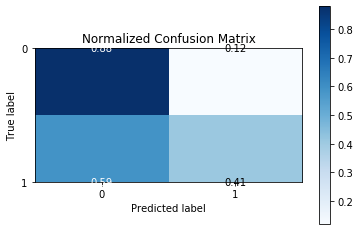

Eficiencia 0.6316  Int_Eficiencia 0.012856126943990567  Sensibilidad 0.6339258663255505  Int_Sensibilidad 0.26810420188336054  Precision 0.68700497099013  Int_Precision 0.10416144102212842  F-Score 0.6041564513431662  Int_F-Score 0.10611485341644823  Error_Prueba 0.36839999999999995  Int_Error 0.01285612694399057  Tiempo ejecución 44.83380436897278


In [34]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_NB(impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

In [ ]:
joblib.dump(nb, 'naive_bayes.pkl') # Guardo el modelo.

# Logistic Regression

In [35]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [36]:
def LRC(c, slv, impresion = False):

    tiempo_i = time.time()
    
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2])
    TN_list = np.zeros([4])
    FP_list = np.zeros([4])
    FN_list = np.zeros([4])
    TP_list = np.zeros([4])   
    errores = np.zeros(4)
    LR = LogisticRegression(C=c, solver=slv)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        LR.fit(Xtrain, Ytrain)
        pred = LR.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        #code for calculating confusion matrix 
        _confusion_matrix_ = confusion_matrix(Ytest, pred)
        TN_list[j] = _confusion_matrix_[0][0]
        FP_list[j] = _confusion_matrix_[0][1]
        FN_list[j] = _confusion_matrix_[1][0]
        TP_list[j] = _confusion_matrix_[1][1]
                
        errores[j] = classification_error(pred, Ytest)
           
    if impresion == True:
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)
#         cm = confusion_matrix(Ytest, pred)
#         columnas = ['Clase %s'%(i) for i in list(ascii_uppercase)[0:len(np.unique(pred))]]
#         df_cm = pd.DataFrame(cm,index = columnas, columns = columnas)
        
#         grafica = sns.heatmap(df_cm, cmap = 'Blues', annot = True)
        
#         grafica.set(xlabel = 'Verdaderos', ylabel = 'Predicciones')
#         print(classification_report(Ytest, pred))

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)

Eficiencia 0.7863  Int_Eficiencia 0.003303028912982747  Sensibilidad 0.7864010699445392  Int_Sensibilidad 0.009470647607593195  Precision 0.7863118174853365  Int_Precision 0.012102706080907038  F-Score 0.7862370065971055  Int_F-Score 0.004943911435461432  Error_Prueba 0.21370000000000003  Int_Error 0.003303028912982755  Tiempo ejecución 56.453391790390015


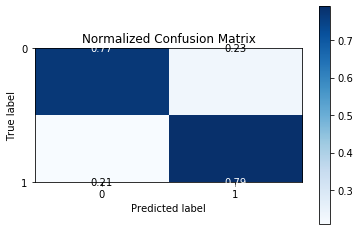

In [39]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = LRC(1, 'newton-cg', impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

In [37]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'Tipo de solver' : pd.Series(['newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 
                          'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 
                          'liblinear', 'liblinear', 'liblinear','liblinear','liblinear','liblinear',
                          'sag','sag','sag','sag','sag','sag',
                          'saga','saga','saga','saga','saga','saga']),
    'Valor de regularización' : pd.Series([0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Tipo de solver', 'Valor de regularización'], inplace=True)

i = 0
for k, n in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = LRC(n, k, impresion = False)
    df_types["Eficiencia"][i] = Acc
    df_types["Int_Eficiencia"][i] = IntAcc
    df_types["Sensibilidad"][i] = Sen
    df_types["Int_Sensibilidad"][i] = IntSen
    df_types["Precision"][i] = Pre
    df_types["Int_Precision"][i] = IntPre
    df_types["F-Score"][i] = f
    df_types["Int_F-Score"][i] = IntF
    df_types["Error_Prueba"][i] = error
    df_types["Int_error"][i] = stdError
    df_types["Tiempo de ejecución"][i] = tiempo
    
    i += 1
    
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [38]:
qgrid_widget.get_changed_df()

Eficiencia  \
Tipo de solver Valor de regularización                       
newton-cg      0.01                     0.7464000000000001   
               0.10                                 0.7774   
               0.50                                 0.7881   
               1.00                                 0.7924   
               1.50                     0.7930999999999999   
               2.00                                 0.7894   
lbfgs          0.01                                 0.7575   
               0.10                                 0.7758   
               0.50                                 0.7891   
               1.00                                  0.796   
               1.50                                 0.7943   
               2.00                                 0.7945   
liblinear      0.01                                 0.7625   
               0.10                                 0.7745   
               0.50                                 0.7845   
               1.00                     0.7961999999999999   
               1.50                                 0.7892   
               2.00                                 0.7939   
sag            0.01                                 0.7524   
               0.10                                 0.7784   
               0.50                                 0.7978   
               1.00                                  0.792   
               1.50                                 0.7988   
               2.00                                 0.7925   
saga           0.01                     0.7595000000000001   
               0.10                     0.7809999999999999   
               0.50                     0.7924999999999999   
               1.00                     0.7938000000000001   
               1.50                     0.7888000000000001   
               2.00                                 0.7969   

                                                Int_Eficiencia  \
Tipo de solver Valor de regularización                           
newton-cg      0.01                      0.0068468971074494645   
               0.10                      0.0026000000000000125   
               0.50                      0.0026286878856189902   
               1.00                       0.006254598308444765   
               1.50                     0.00033166247903555367   
               2.00                       0.012021647141718996   
lbfgs          0.01                       0.007157513534740923   
               0.10                      0.0063592452382338965   
               0.50                       0.006048966853934638   
               1.00                       0.006615134163416513   
               1.50                       0.009140568910084343   
               2.00                       0.010061312041677282   
liblinear      0.01                       0.005309425580983318   
               0.10                       0.004264973622427228   
               0.50                       0.007107038764492572   
               1.00                       0.002236067977499819   
               1.50                       0.002785677655436788   
               2.00                       0.003798683982644523   
sag            0.01                       0.006876045375068435   
               0.10                      0.0031368774282716327   
               0.50                       0.004820788317277572   
               1.00                       0.010182337649086288   
               1.50                       0.004586937976471867   
               2.00                       0.003363034344160027   
saga           0.01                      0.0033749074061372483   
               0.10                       0.009184770002564041   
               0.50                      0.0035707142142714235   
               1.00                       0.007323933369440213   
               1.50                       0.007683749084919412   
               2.

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Se llama a la librería del método Random Forest

In [ ]:
def model_RF(estimadores, caracteristicas, impresion = False):
        
    tiempo_i = time.time()
    
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,7])
    recall_list = np.zeros([4,7])
    f_list = np.zeros([4,7])
    TN_list = np.zeros([4])
    FP_list = np.zeros([4])
    FN_list = np.zeros([4])
    TP_list = np.zeros([4])   
    errores = np.zeros(4)
    
    RF = RandomForestClassifier(n_estimators=estimadores, max_features =caracteristicas)
    
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        RF.fit(Xtrain, Ytrain)
        pred = RF.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_

        #code for calculating confusion matrix 
        _confusion_matrix_ = confusion_matrix(Ytest, pred)
        TN_list[j] = _confusion_matrix_[0][0]
        FP_list[j] = _confusion_matrix_[0][1]
        FN_list[j] = _confusion_matrix_[1][0]
        TP_list[j] = _confusion_matrix_[1][1]
                
        
        errores[j] = classification_error(pred, Ytest)
       
    
    if impresion == True:
        cm = confusion_matrix(Ytest, pred)
        columnas = ['Clase %s'%(i) for i in list(ascii_uppercase)[0:len(np.unique(pred))]]
        df_cm = pd.DataFrame(cm,index = columnas, columns = columnas)
        
        grafica = sns.heatmap(df_cm, cmap = 'Blues', annot = True)
        
        grafica.set(xlabel = 'Verdaderos', ylabel = 'Predicciones')
#         print(classification_report(Ytest, pred))

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)
    

In [ ]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(20, 10, impresion = True)

In [ ]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]), 
    'Variables analizadas por nodo' : pd.Series([2,5,10,13,15,19,2,5,10,13,15,19,2,5,10,13,15,19,2,5,10,13,15,19,2,5,10,13,15,19])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)

for n, k in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(n, k, impresion = False)
    df_types["Eficiencia"][n,k] = Acc
    df_types["Int_Eficiencia"][n,k] = IntAcc
    df_types["Sensibilidad"][n,k] = Sen
    df_types["Int_Sensibilidad"][n,k] = IntSen
    df_types["Precision"][n,k] = Pre
    df_types["Int_Precision"][n,k] = IntPre
    df_types["F-Score"][n,k] = f
    df_types["Int_F-Score"][n,k] = IntF
    df_types["Error_Prueba"][n,k] = error
    df_types["Int_error"][n,k] = stdError
    df_types["Tiempo de ejecución"][n,k] = tiempo


#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)